In [1]:
# IMPORTING ALL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
# READING DATA
data = pd.read_csv("~/Downloads/Diamonds Prices2022.csv") 
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(53943, 11)

In [6]:
#checking for null values
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['color']= label_encoder.fit_transform(data['color'])
  
data['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [12]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['clarity']= label_encoder.fit_transform(data['clarity'])
  
data['clarity'].unique()




array([3, 2, 4, 5, 7, 6, 0, 1])

In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['cut']= label_encoder.fit_transform(data['cut'])
  
data['cut'].unique()

array([2, 3, 1, 4, 0])

In [15]:
X = data[['cut', 'color', 'clarity','depth', 'table', 'carat']]
y = data[['price']]
X.head(10)

,cut,color,clarity,depth,table,carat
0,2,1,3,61.5,55.0,0.23
1,3,1,2,59.8,61.0,0.21
2,1,1,4,56.9,65.0,0.23
3,3,5,5,62.4,58.0,0.29
4,1,6,3,63.3,58.0,0.31
5,4,6,7,62.8,57.0,0.24
6,4,5,6,62.3,57.0,0.24
7,4,4,2,61.9,55.0,0.26
8,0,1,5,65.1,61.0,0.22
9,4,4,4,59.4,61.0,0.23


In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=1)
y_test.head()



,price
35774,912
24679,13037
38804,1046
17964,7260
36079,925


<ipython-input-19-6d0bceba7a9a>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


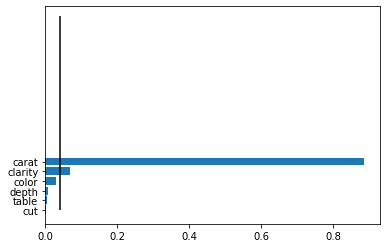

[0.00260548 0.03069778 0.06856425 0.00800048 0.00416549 0.88596652]


<ipython-input-19-6d0bceba7a9a>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


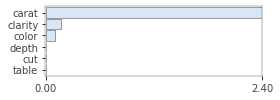

In [19]:
import rfpimp
from rfpimp import importances, plot_importances
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.vlines(0.04, 0, 20, linestyles ="solid", colors ="k")
plt.show()
print(rf.feature_importances_)


rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

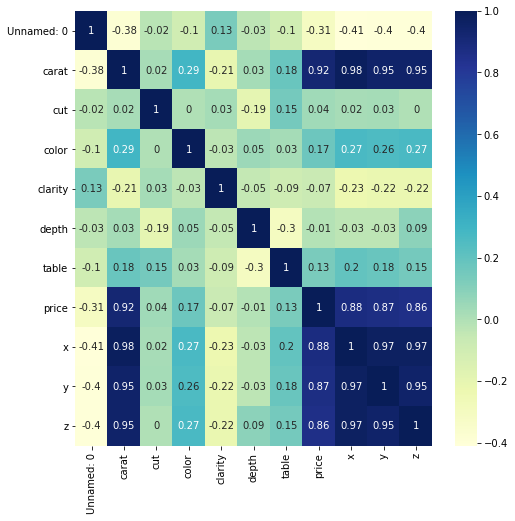

In [33]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
#df = pd.DataFrame(data, columns=["growth_rate","Age","Time_of_service","Unit","Pay_Scale","VAR2","Post_Level","Hometown","VAR6","VAR1"])

# Default heatmap
#p1 = sns.heatmap(df)

# # Draw a heatmap with the numeric values in each cell
# p1= sns.heatmap(X, annot=True)

#columns=["growth_rate","Age","Time_of_service","Unit","Pay_Scale","VAR2","Post_Level","Hometown","VAR6","VAR1"]
# Use the heatmap function from the seaborn package
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(data.corr().round(2), cmap="YlGnBu", annot=True);

# Display the Pharma Sector Heatmap
plt.show()

In [22]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)
max(y_prediction)
#y_prediction
#model.coef_

array([28736.31175531])

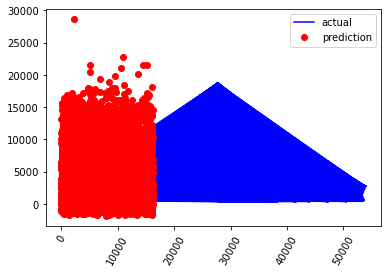

In [23]:
plt.plot(y_train, 'b-', label = 'actual')

plt.plot(y_prediction, 'ro', label = 'prediction')
plt.xticks(rotation ='60')
plt.legend()

[Text(0.5, 0, 'Carat Size'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Carat Size vs. Price')]

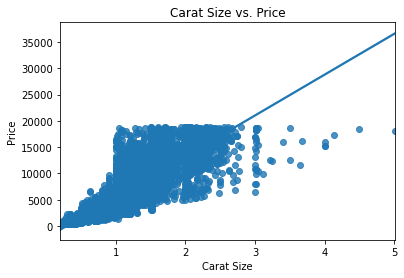

In [25]:
sns.regplot(data=data, x='carat', y='price').set(xlabel='Carat Size', ylabel='Price', title='Carat Size vs. Price')

In [1]:
cut_price = data.groupby("cut").price.mean().reset_index()
sns.barplot(data=cut_price, x="cut", y='price')

NameError: name 'data' is not defined

<AxesSubplot:xlabel='color', ylabel='price'>

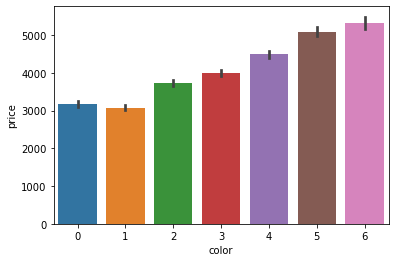

In [31]:
sns.barplot(data=data, x='color', y='price')